<a href="https://colab.research.google.com/github/Makhmoor-fiza/Colab-Notebooks/blob/main/Vgg19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Unzip the dataset from Google Drive
import os
import zipfile

# Path to the dataset on Google Drive
zip_path = '/content/drive/MyDrive/nail_dataset_october.zip'

# Unzip the dataset into /content/nail_dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/nail_dataset')

# Load necessary libraries
from __future__ import print_function
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from keras.models import Model, load_model
from keras.layers import Flatten, Dense, Input, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

Mounted at /content/drive


In [3]:
 # Define the model
def VGGupdated(input_tensor=None, classes=2):
    img_rows, img_cols = 300, 300
    img_channels = 3
    img_dim = (img_rows, img_cols, img_channels)

    img_input = Input(shape=img_dim)

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    # Classification block
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dense(classes, activation='softmax', name='predictions')(x)

    # Create model
    model = Model(inputs=img_input, outputs=x, name='VGGdemo')
    return model


In [4]:
# Updated dataset paths based on the folder structure
train_path = '/content/nail_dataset/nail_dataset/train'
test_path = '/content/nail_dataset/nail_dataset/test'
classes = ['healthy', 'melanoma']

def load_data(data_path, img_size=300):
    images = []
    labels = []

    for label in classes:
        class_path = os.path.join(data_path, label)
        filenames = os.listdir(class_path)
        for f in filenames:
            img = cv2.imread(os.path.join(class_path, f))
            img = cv2.resize(img, (img_size, img_size))
            images.append(img)
            labels.append(label)

    # Convert to numpy array and normalize
    images = np.array(images)
    images = images.astype('float32') / 255.0

    # Encode labels
    le = LabelEncoder()
    labels_encoded = le.fit_transform(labels)
    labels_onehot = to_categorical(labels_encoded, num_classes=2)

    return images, labels_onehot

In [5]:
# Load train and test data
train_x, train_y = load_data(train_path)
test_x, test_y = load_data(test_path)

# Shuffle training data
train_x, train_y = shuffle(train_x, train_y, random_state=1)

# Inspect the shape of the training and testing data
print("Training data shape:", train_x.shape)
print("Testing data shape:", test_x.shape)

# Compile the model
model = VGGupdated(classes=2)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Training data shape: (587, 300, 300, 3)
Testing data shape: (147, 300, 300, 3)


Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2185s 114s/step - accuracy: 0.4832 - loss: 1.4352 - val_accuracy: 0.4762 - val_loss: 0.6935
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2222s 117s/step - accuracy: 0.4997 - loss: 0.7229 - val_accuracy: 0.5238 - val_loss: 0.6945
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2170s 113s/step - accuracy: 0.5020 - loss: 0.6994 - val_accuracy: 0.5238 - val_loss: 0.6920
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2151s 113s/step - accuracy: 0.5532 - loss: 0.6902 - val_accuracy: 0.5238 - val_loss: 0.6920
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2181s 113s/step - accuracy: 0.5230 - loss: 0.6923 - val_accuracy: 0.5238 - val_loss: 0.6921
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2189s 113s/step - accuracy: 0.5471 - loss: 0.6894 - val_accuracy: 0.5238 - val_loss: 0.6920
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2210s 116s/step - accuracy: 0.5244 - loss: 0.6922 - val_accuracy: 0.5238 - val_loss: 0.6921
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2227s 116s/step - accuracy: 0.4922 - loss: 0.6949 - 

Model saved at: /content/drive/MyDrive/vgg_nail_model.h5
5/5 ━━━━━━━━━━━━━━━━━━━━ 167s 31s/step - accuracy: 0.7419 - loss: 0.6764
Test Loss: 0.6920822262763977
Test Accuracy: 0.523809552192688


<Figure size 1200x400 with 0 Axes>

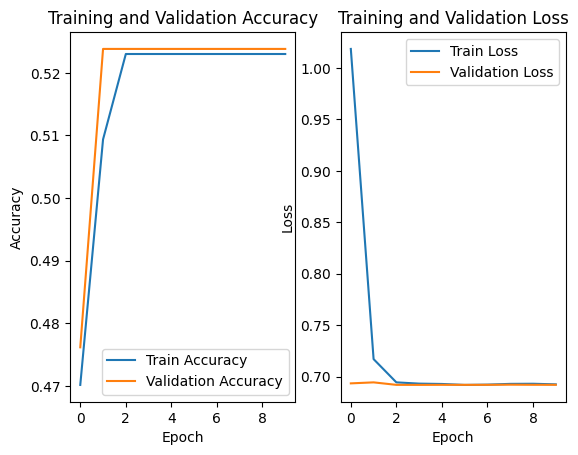

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [6]:
# Train the model and save the history
history = model.fit(train_x, train_y, epochs=10, batch_size=32, validation_data=(test_x, test_y))

# Save the trained model to Google Drive
model_save_path = '/content/drive/MyDrive/vgg_nail_model.h5'
model.save(model_save_path)
print(f"Model saved at: {model_save_path}")
# Evaluate the model
loss, acc = model.evaluate(test_x, test_y)
print("Test Loss:", loss)
print("Test Accuracy:", acc)

# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))

plt.show()
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
# Example of predicting a new image
img_path = '/content/drive/MyDrive/path_to_new_image.jpg'  # Replace with your image path
img = cv2.imread(img_path)
img = cv2.resize(img, (300, 300))
img = np.expand_dims(img, axis=0)
img = img.astype('float32') / 255.0

# Load the saved model and predict
model = load_model(model_save_path)
pred = model.predict(img)
predicted_class = np.argmax(pred, axis=1)
class_labels = {0: 'healthy', 1: 'melanoma'}
print(f"Prediction: {class_labels[predicted_class[0]]}")